In [1]:
import os
os.environ['ZFIT_DISABLE_TF_WARNINGS'] = '1'
# numpy is used for generating, storing, and plotting data
import numpy as np

import uproot

# in order to visualise the results of the computation, we use matplotlib
import matplotlib as mpl

import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.LHCb2)
plt.rcParams['text.usetex'] = True
# for histograms boost has an easy api and is very fast
import hist
# for statistical distributions we can use a lot from scipy
from scipy import stats

## File import, data processing
 

In [2]:
path = '/eos/lhcb/user/p/pgaigne/job27-CombDVntuple-test.root'
path = "/eos/lhcb/user/p/pgaigne/job27-CombDVntuple-split-test-0.root"

file = uproot.open(path)
print(file.keys())

#xicc_turbo = file['Xicc_TURBO/DecayTree']
#xicc_rec = file['Xicc_REC/DecayTree']
#lc_turbo = file['Lambdac_TURBO/DecayTree']

xicc_turbo = file['tuple_sel_Xicc/DecayTree']
xicc_rec = file['tuple_sel_rec/DecayTree']
lc_turbo = file['tuple_sel_Lc/DecayTree']


['tuple_sel_Lc;1', 'tuple_sel_Lc/DecayTree;1', 'tuple_sel_rec;1', 'tuple_sel_rec/DecayTree;1', 'tuple_sel_Xicc;1', 'tuple_sel_Xicc/DecayTree;1', 'GetIntegratedLuminosity;1', 'GetIntegratedLuminosity/LumiTuple;1']


In [3]:
xicc_turbo#['Xicc_M']

<TTree 'DecayTree' (632 branches) at 0x7fedc73d6a00>

In [4]:
data_xicc_turbo = xicc_turbo['Xicc_M'].array(library="np")
data_xicc_rec = xicc_rec['Xicc_M'].array(library="np")
data_lc_turbo = lc_turbo['Lc_M'].array(library="np")

In [5]:
file.close()

## Xicc Turbo plot

In [12]:
data = data_xicc_turbo

data_min = data.min()
data_max = data.max()

print(f'Min: {data_min:.3f} Max: {data_max:.3f}')
print(f'Number of events: {len(data)}')

obs_min = data_min
obs_max = 4000
obs_bin_width = 5
obs_bin = int((obs_max-obs_min)/obs_bin_width)

Min: 3103.968 Max: 4976.554
Number of events: 389938


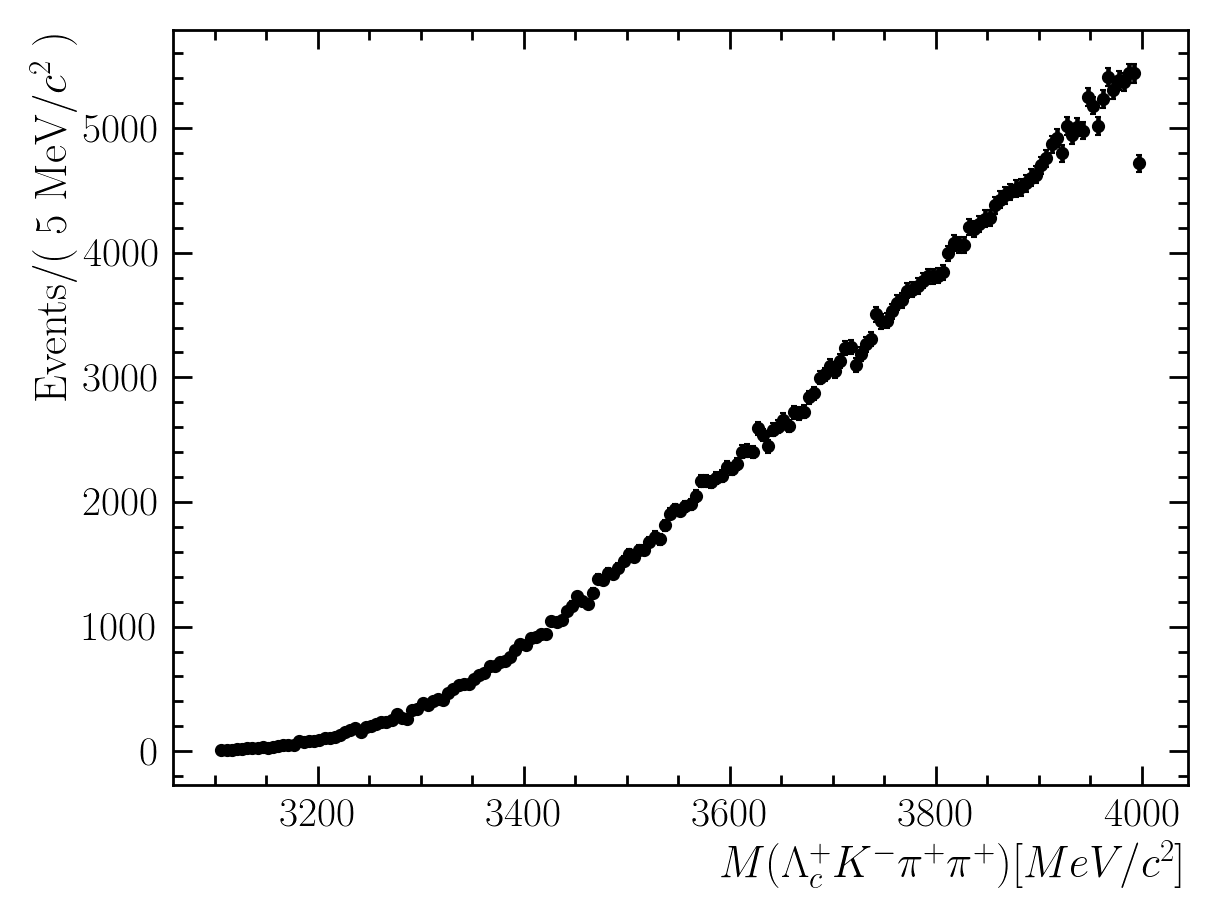

In [13]:
# visualise the data using a histogram:
fig, ax = plt.subplots()
# histogram with centered bins
histo = hist.Hist(hist.axis.Regular(obs_bin, obs_min, obs_max, label='Observable'))
histo.fill(data)
# errorbar histogram for the data
ax.errorbar(histo.axes.centers[0], histo.values(), xerr=histo.axes.widths[0]/2,
           yerr=np.sqrt(histo.values()), fmt='.', label='Data', color='black')
# labels
#ax.set_xlabel('$m_{cand}(\Xi_{cc}^{++})[MeV/c^2]$')
ax.set_xlabel('$M(\Lambda_c^+ K^- \pi^+ \pi^+)[MeV/c^2]$')
ax.set_ylabel(f'Events/( {obs_bin_width} MeV/$c^2$ )');

## Xicc Reconstruction plot

In [8]:
data = data_xicc_rec

data_min = data.min()
data_max = data.max()

print(f'Min: {data_min:.3f} Max: {data_max:.3f}')
print(f'Number of events: {len(data)}')

obs_min = data_min
obs_max = data_max
obs_bin_width = 5
obs_bin = int((obs_max-obs_min)/obs_bin_width)

Min: -4805.907 Max: 4196.759
Number of events: 26259254


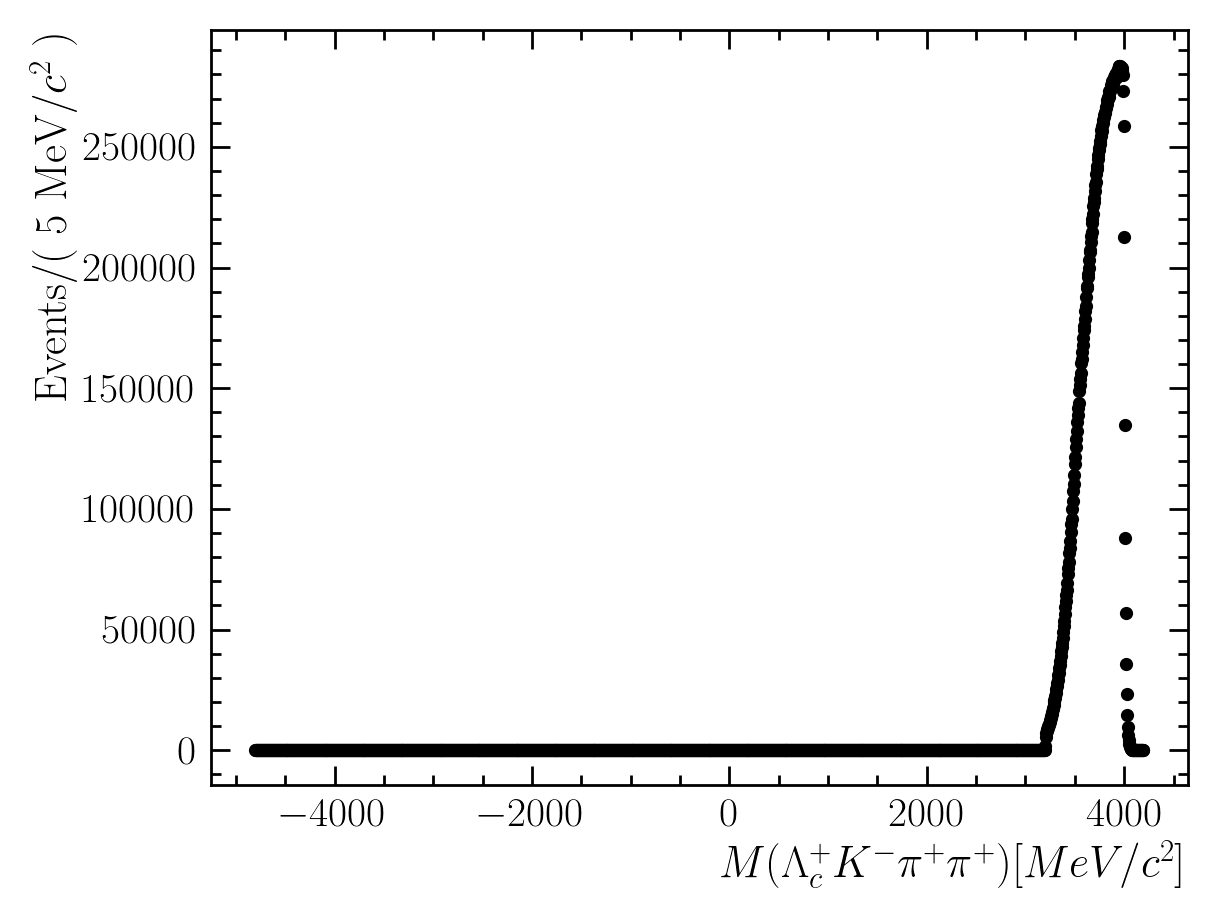

In [9]:
# visualise the data using a histogram:
fig, ax = plt.subplots()
# histogram with centered bins
histo = hist.Hist(hist.axis.Regular(obs_bin, obs_min, obs_max, label='Observable'))
histo.fill(data)
# errorbar histogram for the data
ax.errorbar(histo.axes.centers[0], histo.values(), xerr=histo.axes.widths[0]/2,
           yerr=np.sqrt(histo.values()), fmt='.', label='Data', color='black')
# labels
#ax.set_xlabel('$m_{cand}(\Xi_{cc}^{++})[MeV/c^2]$')
ax.set_xlabel('$M(\Lambda_c^+ K^- \pi^+ \pi^+)[MeV/c^2]$')
ax.set_ylabel(f'Events/( {obs_bin_width} MeV/$c^2$ )');

## Lc Turbo plot

In [10]:
data = data_lc_turbo

data_min = data.min()
data_max = data.max()

print(f'Min: {data_min:.3f} Max: {data_max:.3f}')
print(f'Number of events: {len(data)}')

obs_min = data_min
obs_max = data_max
obs_bin_width = 3
obs_bin = int((obs_max-obs_min)/obs_bin_width)

Min: 2211.000 Max: 2362.000
Number of events: 12875054


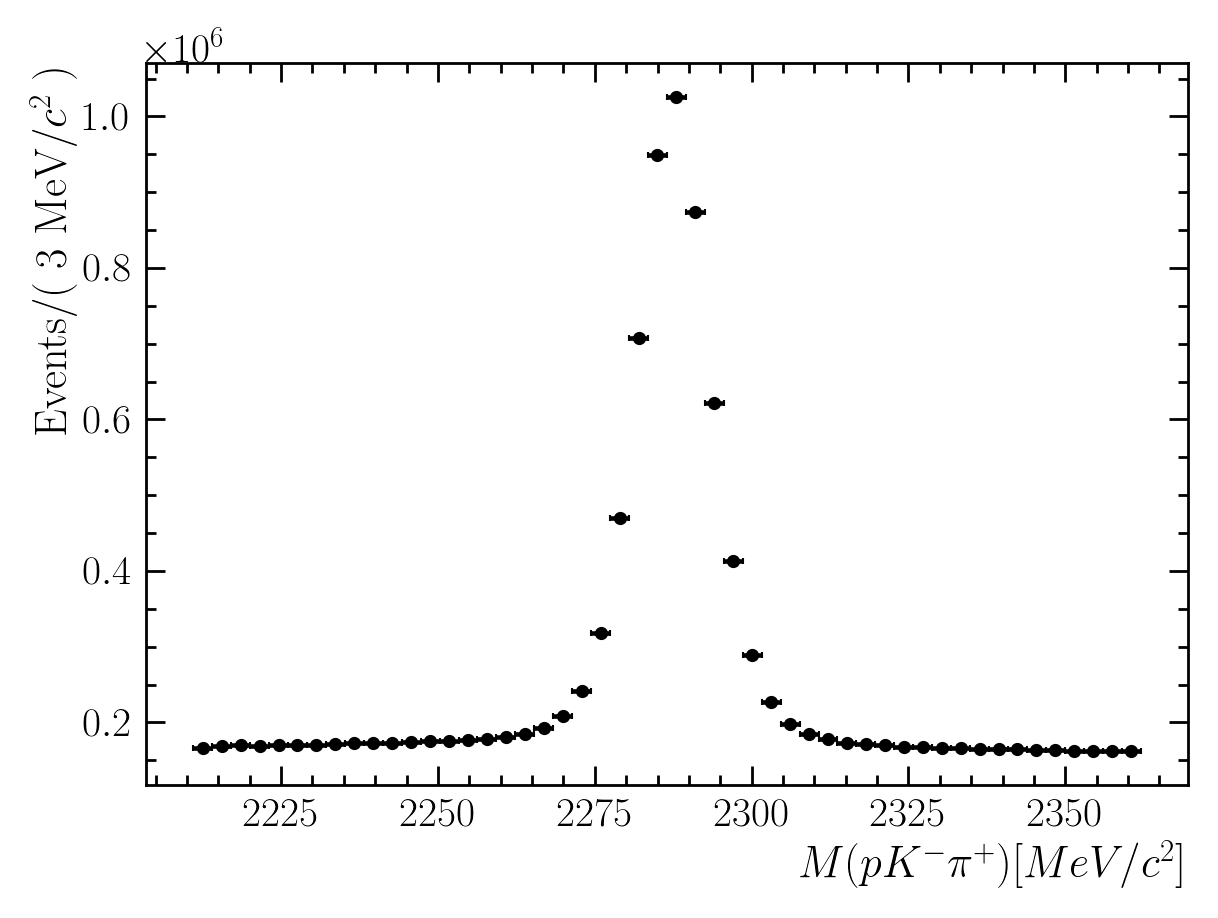

In [11]:
# visualise the data using a histogram:
fig, ax = plt.subplots()
# histogram with centered bins
histo = hist.Hist(hist.axis.Regular(obs_bin, obs_min, obs_max, label='Observable'))
histo.fill(data)
# errorbar histogram for the data
ax.errorbar(histo.axes.centers[0], histo.values(), xerr=histo.axes.widths[0]/2,
           yerr=np.sqrt(histo.values()), fmt='.', label='Data', color='black')
# labels
#ax.set_xlabel('$m_{cand}(\Xi_{cc}^{++})[MeV/c^2]$')
ax.set_xlabel('$M(p K^- \pi^+)[MeV/c^2]$')
ax.set_ylabel(f'Events/( {obs_bin_width} MeV/$c^2$ )');